In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report

In [2]:
df = pd.read_csv("/kaggle/input/textdb3/fake_or_real_news.csv")
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#print StopWords in English
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df['content'] = df['title'] + " " + df['text']
df.head()

,Unnamed: 0,title,text,label,content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


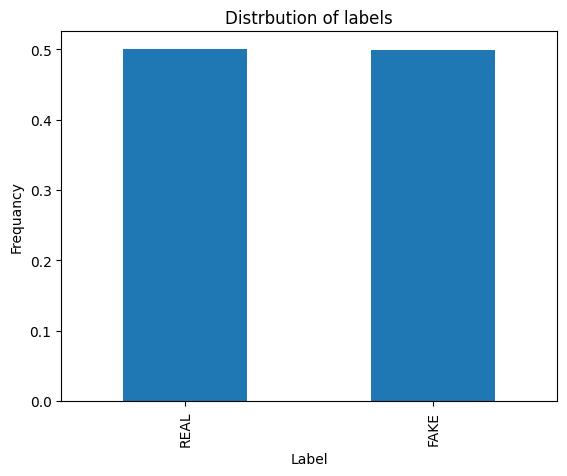

In [12]:
df['label'].value_counts(normalize = True).plot(kind= 'bar')
plt.title("Distrbution of labels")
plt.xlabel("Label")
plt.ylabel("Frequancy")
plt.show();

# Stemming

#### Stemming is the process of reducting a word to its base or root form, by removing suffixes and prefixes

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):

    #replace any non-alphabetic character in the content variable with a space character
    stemmed_content = re.sub('[^a-zA-Z]' , " ",content)
    #convert all words into lower case letters
    stemmed_content = stemmed_content.lower()
    #split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words("english")]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [15]:
df['content']= df['content'].apply(stemming)

In [16]:
df['content']

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi u secretari stat...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say find email clinton specialist...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    anti trump protest tool oligarchi inform anti ...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: content, Length: 6335, dtype: object

# Converting the Textual data to Numerical data

In [18]:
tfidf_vectorizer = TfidfVectorizer()
vectorizer = tfidf_vectorizer.fit_transform(df['content'].values)

# Split data into Train & Test

In [28]:
target = df['label'].values
target

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [29]:
print(f"Target shape: {target.shape}")
print(f"X shape: {vectorizer.shape}")

Target shape: (6335,)
X shape: (6335, 43893)


In [30]:
X_train , X_test , y_train , y_test = train_test_split(vectorizer , target , test_size = 0.2 , random_state = 42)

In [31]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 5068
The shape of X_test is: 1267


# Iterate

In [33]:
def train(model , model_name ):
    model.fit(X_train , y_train)
    print(f"Training Accuracy of {model_name} is {model.score(X_train , y_train)}")
    print(f"Test Accuracy of {model_name} is {model.score(X_test , y_test)}")
    
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )

def class_report(model):

    print(classification_report(y_test , model.predict(X_test)))

# Logistic Regression

In [34]:
lg_model = LogisticRegression()

In [35]:
train(lg_model , "Logistic Regression")

Training Accuracy of Logistic Regression is 0.9530386740331491
Test Accuracy of Logistic Regression is 0.9155485398579322


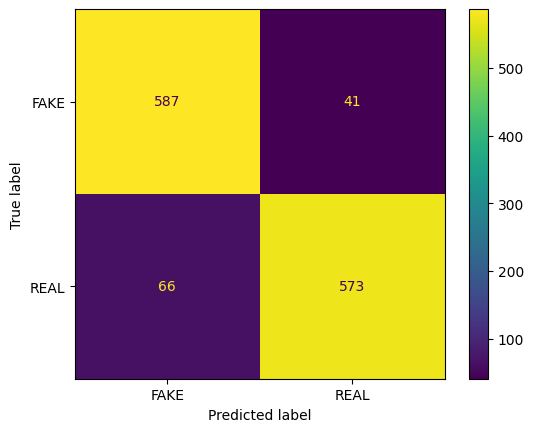

In [36]:
conf_matrix(lg_model)

In [37]:
class_report(lg_model)

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       628
        REAL       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# Support Vector Classifier

In [38]:
svc = SVC()

In [39]:
train(svc , "Support Vector Classifier")

Training Accuracy of Support Vector Classifier is 0.9952644041041832
Test Accuracy of Support Vector Classifier is 0.9313338595106551


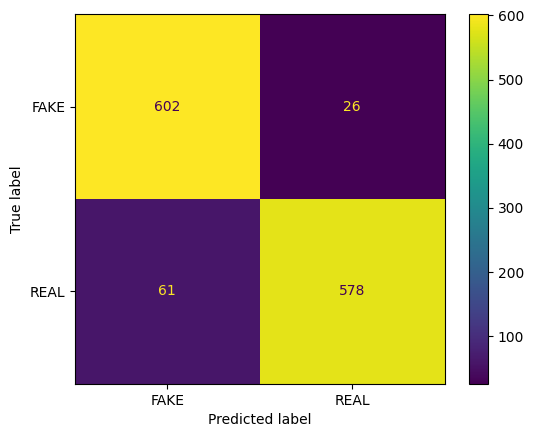

In [40]:
conf_matrix(svc)

In [41]:
class_report(svc)

              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.93       628
        REAL       0.96      0.90      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

